In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime,timedelta
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# from statsmodels.tsa.arima_model import ARMA,ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

Text(0.5, 1.0, 'Timeseries')

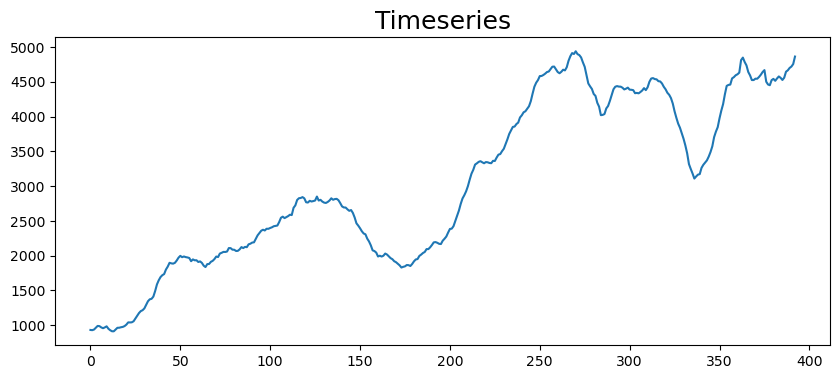

In [88]:
time_estudo = pd.read_csv('../Docs/website_data.csv') #bases de exemplo
plt.figure(figsize=(10,4))
plt.plot(time_estudo)
plt.title('Timeseries', fontsize=18)

In [89]:
perform_adf_test(time_estudo)

ADF Statistic: -1.111374
p-value: 0.710515


In [90]:
# Criar um índice de datas
data_inicio = '2023-01-01'  # Data inicial
datas = pd.date_range(start=data_inicio, periods=len(time_estudo), freq='D')



In [92]:
# Criar o DataFrame
df_estudo = pd.DataFrame(data=time_estudo.values, index=datas, columns=['Valores'])

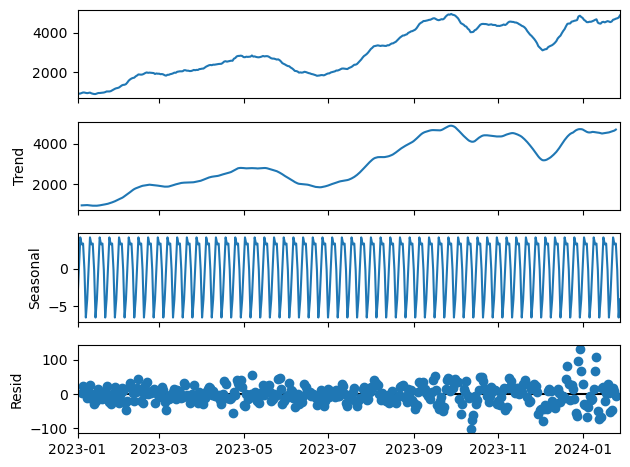

In [93]:
# Decompõe a timeseries
decomposicao = seasonal_decompose(df_estudo,model='aditive')
decomposicao.plot()
plt.show()

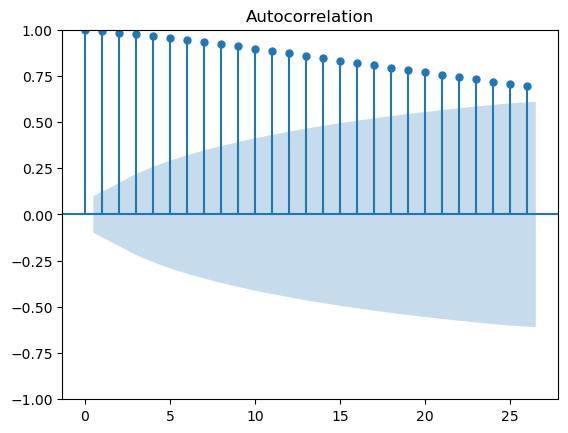

In [94]:
acf_original = plot_acf(time_estudo)

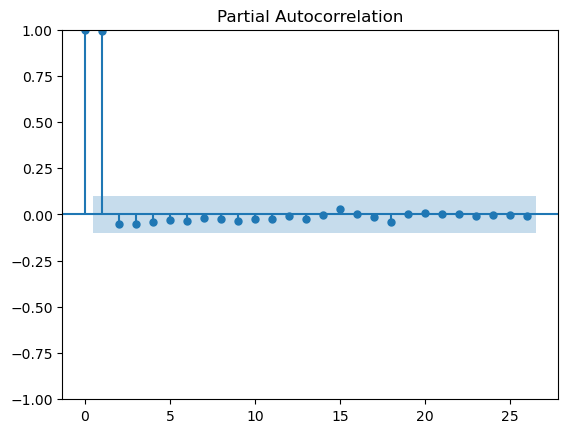

In [95]:
pacf_original = plot_pacf(time_estudo)

Indica Tendencia, sendo assim, devemos diferenciar nossa série

<Axes: >

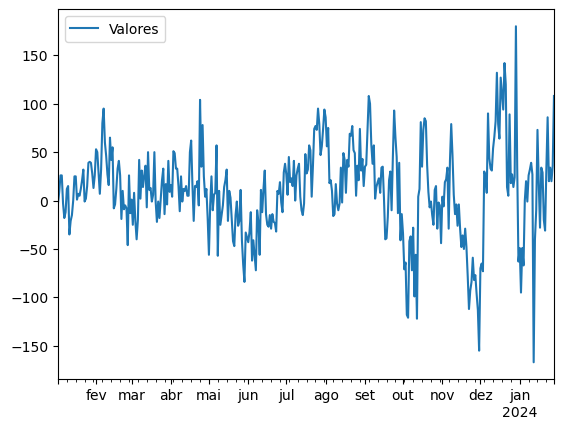

In [96]:
df_estudo_diff =  df_estudo.diff().dropna()
df_estudo_diff.plot()

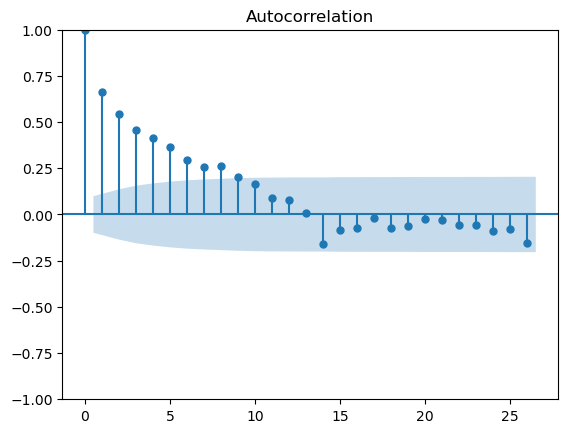

In [97]:
acf_diff = plot_acf(df_estudo_diff.values)

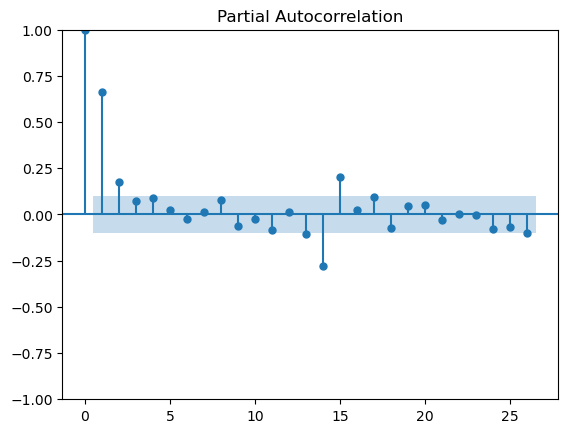

In [98]:
pacf_diff = plot_pacf(df_estudo_diff.values)

In [99]:
perform_adf_test(df_estudo_diff)

ADF Statistic: -4.127086
p-value: 0.000873


Assim, o ARIMA deve ser (p,1,q)

Pela análise dos ACF e PACF teremos ARIMA(2,1,0)

In [123]:
msk = (time_estudo.index < len(time_estudo)-40)
df_train = time_estudo[msk].copy()
df_test = time_estudo[~msk].copy()

In [125]:
modelo = ARIMA(df_train,order=(2,1,0))
modelo_fit = modelo.fit()
print(modelo_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                traffic   No. Observations:                  353
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1688.613
Date:                sáb, 21 set 2024   AIC                           3383.226
Time:                        22:48:45   BIC                           3394.817
Sample:                             0   HQIC                          3387.839
                                - 353                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5556      0.048     11.600      0.000       0.462       0.649
ar.L2          0.2541      0.053      4.806      0.000       0.150       0.358
sigma2       857.3445     60.109     14.263      0.0

In [126]:
forcast_test = modelo_fit.forecast(len(df_test))

<Axes: >

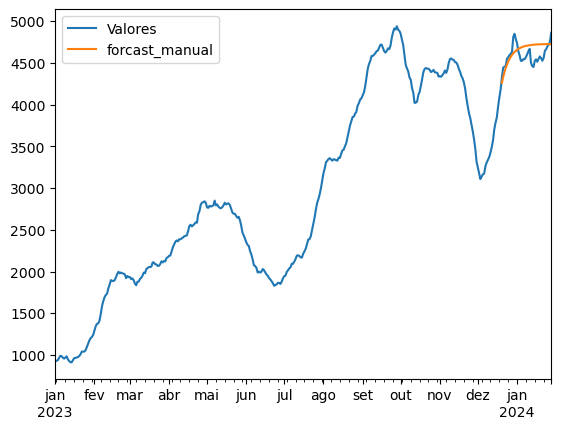

In [127]:
df_estudo['forcast_manual'] = [None]*len(df_train) + list(forcast_test)
df_estudo.plot()